#HW UNSUPERVISED

# **BlueCode Team**

*   Agustina Sri Wardani
*   Fatchul Arifin
*   Ferry Setefanus
*   Gigih Septian
*   Kornelius Rio
*   M. Harun Arrasyid
*   Raza Aqil Maulana

## load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('flight.csv')

## EDA

### Descriptive statistic

#### data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.sample(1)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
56132,14163,4/3/2011,4/4/2011,Male,4,kunming,yunnan,CN,34.0,3/31/2014,...,731.0,2857,2/28/2014,33,400.0,400,0,0.645985,1040,0


**nama kolom dan isinya kurang sesuai**
- FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE: seharusnya DATE bukan object

#### missing value

In [ ]:
#cek data kosong
counts = df.isna().sum().sort_values(ascending=False)
#cek persen data kosong
percentages = round(df.isna().mean() * 100, 3).sort_values(ascending=False)
#gabungkan
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
null_values

,count,%
WORK_PROVINCE,3248,5.157
WORK_CITY,2269,3.602
SUM_YR_1,551,0.875
AGE,420,0.667
SUM_YR_2,138,0.219
WORK_COUNTRY,26,0.041
GENDER,3,0.005
MEMBER_NO,0,0.000
LAST_FLIGHT_DATE,0,0.000
Points_Sum,0,0.000


In [ ]:
print(f'Persentase Total missing value adalah:',percentages.sum(),'%')

Persentase Total missing value adalah: 10.566 %


**handling missing value**
Persentase missing values secara keseluruhan adalah 10.566% yang mana lebih kecil dari 30%. Bisa disimpulkan bahwa nilai persentase missing value kecil dan dilakukan drop values pada semua missing value tersebut.

#### duplikat

In [ ]:
#cek duplikat
df.duplicated().any()

False

In [ ]:
df.sample(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
61078,4214,8/22/2009,9/21/2009,Female,4,guangzhou,guangdong,CN,38.0,3/31/2014,...,0.0,1140,9/1/2012,578,41.0,81,0,0.933333,6303,13
60649,24174,10/29/2011,6/17/2012,Male,4,nanjing,jiangsu,CN,60.0,3/31/2014,...,0.0,4578,3/24/2013,374,140.0,210,0,0.250000,0,0
43280,52305,12/26/2012,12/26/2012,Female,4,shijiazhuang,hebei,CN,43.0,3/31/2014,...,1879.0,5629,11/8/2013,145,158.5,202,0,0.700796,2982,0


#### pembagian kelompok sesuai jenis

##### numerik

In [ ]:
#numerik
nums = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print('Jumlah data numerikal adalah:',len(nums))
nums

Jumlah data numerikal adalah: 15


['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


- Mayoritas distribusi data bersifat skewness positive dimana nilai mean > median
- MEMBER_NO, FFP_TIER dan avg_discount memiliki nilai mean yang hampir sama dengan median yang menandakan fitur tersebut berdistribusi normal
- mayoritas kolom memiliki std dan mean tidak terlalu jauh
- Terdapat nilai yang aneh pada kolom SUM_YR_1 bernilai 0 yang menandakan Fare Revenu bernilai 0 dan avg_discount yang bernilai 0 sehingga perlu dilakukan analisis lebih lanjut
- Pada kolom AGE terdapat nilai yang aneh yaitu 110 


##### kategorikal

In [ ]:
#kategorikal
cats = df.loc[:, (df.dtypes == object)].columns.tolist()
print('Jumlah data Kategorikal adalah:',len(cats))
cats

Jumlah data Kategorikal adalah: 8


['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

In [ ]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


- Customer yang paling banyak adalah customer laki-laki (Male) dengan persentase sebesar 76.42%.
- Customer paling banyak berasal dari kota guangzhou dengan persentase sebesar 15.46%.
- Customer paling banyak berasal dari provinsi guangdong dengan persentase sebesar 29.31%.
- Customer paling banyak berasal dari China CN dengan persentase 91.72%.

**Dapat disimpulkan bahwa data ini sepertinya berasal dari data maskapai penerbangan China**

In [ ]:
#pembagian kelompok fitur berdasarkan jenis 
nums = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
#value cats counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
--------------------------------------------------
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
--------------------------------------------------
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
x

Secara keseluruhan data kategorikal memiliki unique values yang banyak

### Univariate Analysis

### untuk nums

#### cek outlier

In [ ]:
nums1 = nums[0:7]

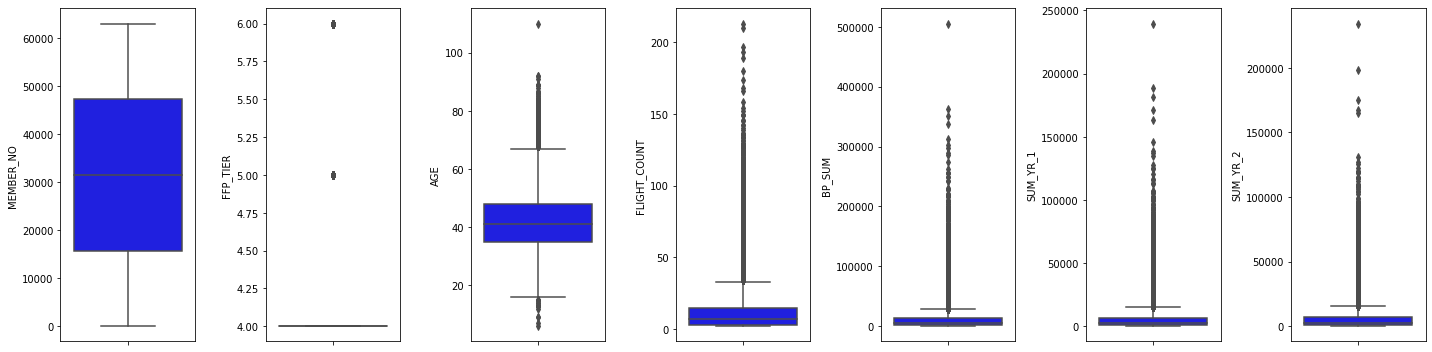

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

In [ ]:
nums2 = nums[7:]

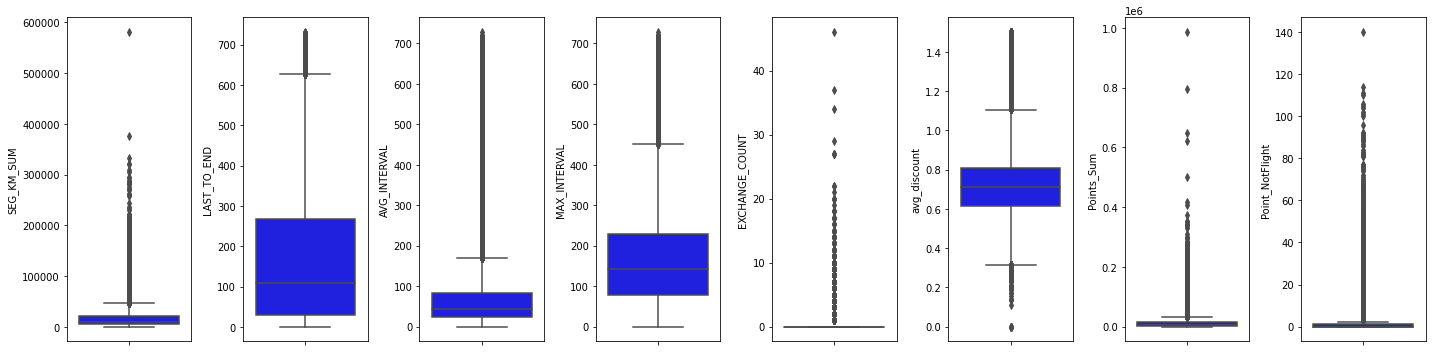

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='blue', orient='v')
    plt.tight_layout()
plt.show()

**Hal terpenting yang harus diperhatikan dari visualisasi boxplot di atas adalah keberadaan outliers**
- Mayoritas kolom nums masih memiliki outlier
- null value di kolom SUM_YR_1, SUM_YR_2 akan diisi dengan nilai median karena terdapat outlier
- Dari visualisasi boxplot di atas terlihat bahwa sebagian besar kolom memiliki distribusi yang miring (skewed distribution)

#### cek distribusi

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

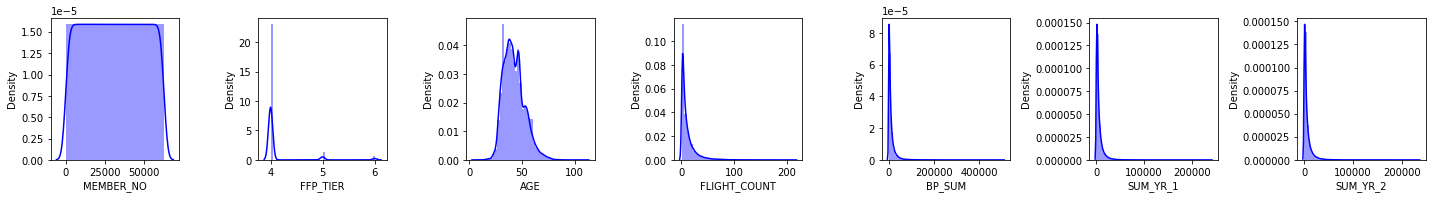

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.distplot(df[nums1[i]], color='blue')
    plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

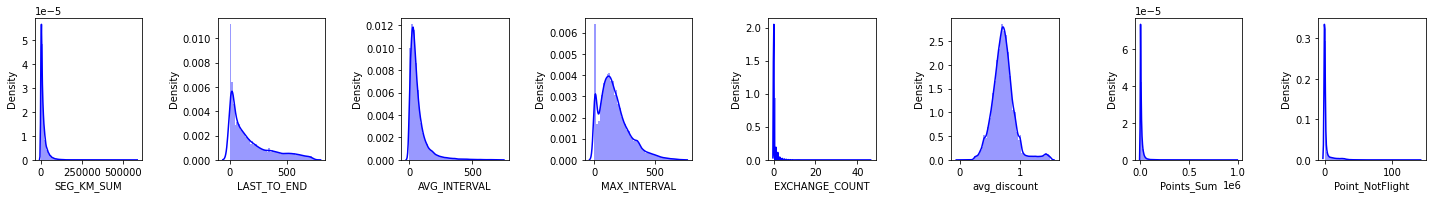

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(nums2)):
    plt.subplot(2, len(nums2), i+1)
    sns.distplot(df[nums2[i]], color='blue')
    plt.tight_layout()
plt.show()

**Hal terpenting yang harus diperhatikan dari visualisasi displot di atas adalah bentuk distribusinya**

Seperti yang kita duga di visualisasi boxplot, sebagian besar kolom memiliki distribusi miring (skewed distribution)

### untuk cats

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

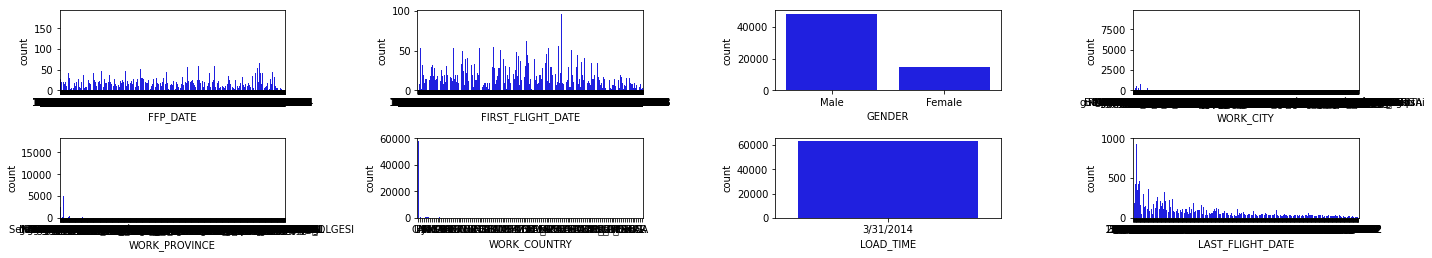

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(0, len(cats)):
    plt.subplot(3, 4, i+1)
    sns.countplot(df[cats[i]], color='blue', orient='h')
    plt.tight_layout()

### multivariate analysis

#### korelasi

In [ ]:
df.corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.006177,0.002833,-0.000349,-0.001166,-0.002576,-0.000478,-0.000863,-0.003088,0.002319,0.004549,-0.003180,0.000023,-0.004913,-0.034135
FFP_TIER,-0.006177,1.000000,0.085905,0.588901,0.586410,0.466562,0.615941,0.527334,-0.207712,-0.148929,-0.134850,0.343116,0.252143,0.561146,0.193578
AGE,0.002833,0.085905,1.000000,0.081172,0.108472,0.117879,0.089983,0.094170,-0.030374,-0.028825,0.006999,0.034410,0.138932,0.081930,-0.085583
FLIGHT_COUNT,-0.000349,0.588901,0.081172,1.000000,0.799044,0.751656,0.801877,0.856775,-0.402303,-0.323201,-0.201112,0.505384,0.145450,0.752586,0.292473
BP_SUM,-0.001166,0.586410,0.108472,0.799044,1.000000,0.853582,0.885668,0.922336,-0.320492,-0.255118,-0.160078,0.528405,0.313783,0.918903,0.247145
SUM_YR_1,-0.002576,0.466562,0.117879,0.751656,0.853582,1.000000,0.664390,0.805199,-0.188251,-0.245883,-0.149847,0.487864,0.272442,0.787293,0.237467
SUM_YR_2,-0.000478,0.615941,0.089983,0.801877,0.885668,0.664390,1.000000,0.851236,-0.424016,-0.253129,-0.165475,0.467723,0.239145,0.823624,0.240458
SEG_KM_SUM,-0.000863,0.527334,0.094170,0.856775,0.922336,0.805199,0.851236,1.000000,-0.369485,-0.289118,-0.168349,0.507629,0.112914,0.849202,0.261338
LAST_TO_END,-0.003088,-0.207712,-0.030374,-0.402303,-0.320492,-0.188251,-0.424016,-0.369485,1.000000,-0.099811,-0.332382,-0.170271,-0.021704,-0.291306,-0.122303
AVG_INTERVAL,0.002319,-0.148929,-0.028825,-0.323201,-0.255118,-0.245883,-0.253129,-0.289118,-0.099811,1.000000,0.723881,-0.133426,-0.042364,-0.226760,-0.078359


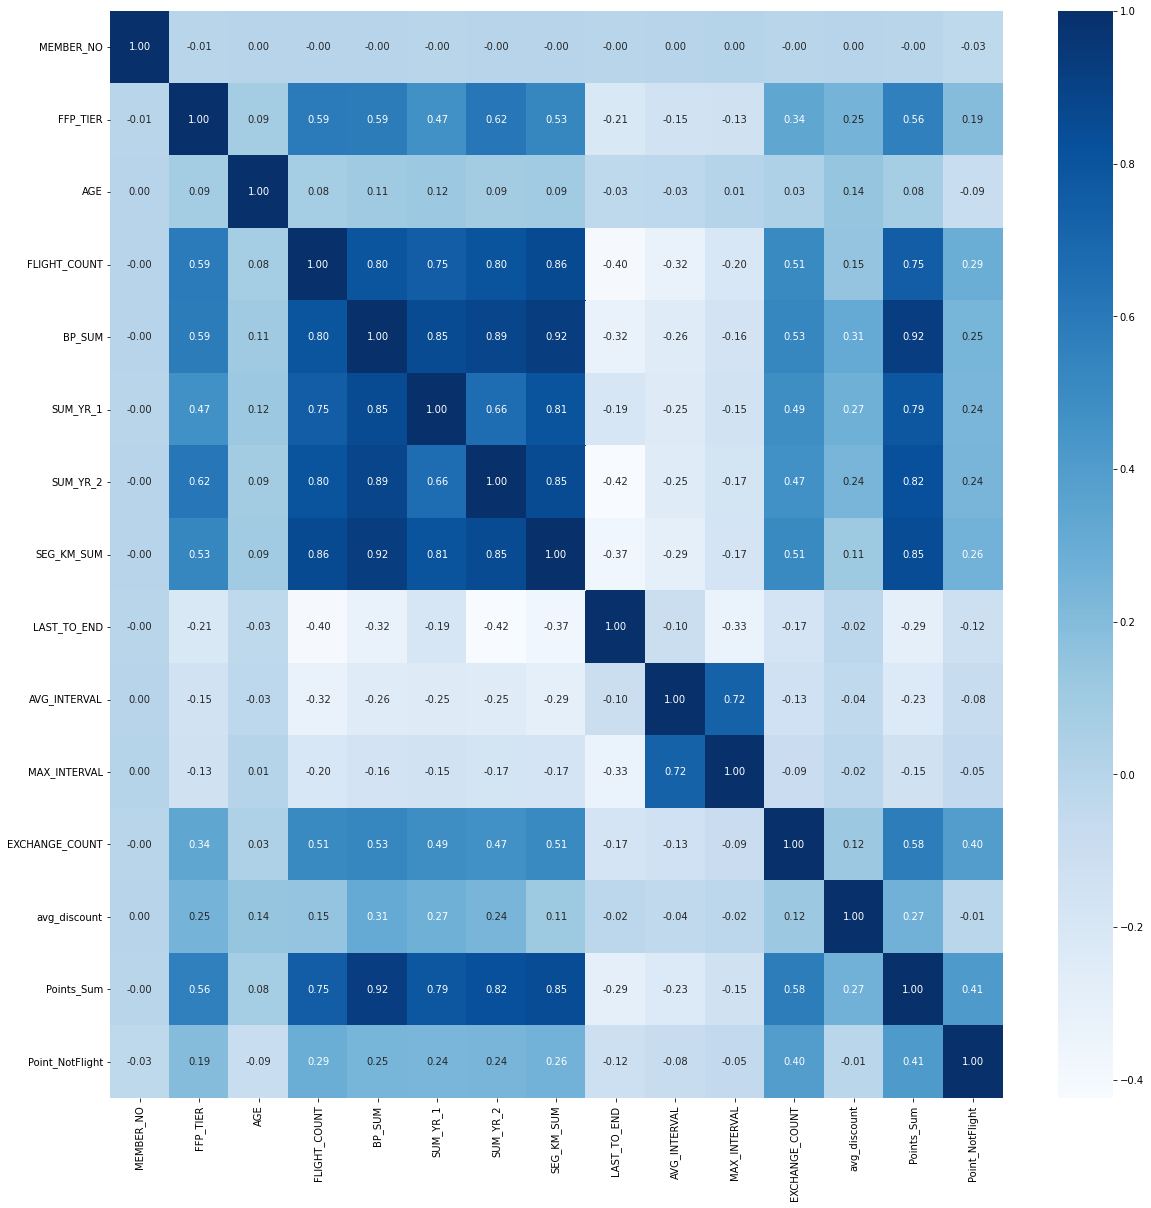

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**kolom-kolom yang berkorelasi kuat satu sama lain**
- FLIGHT_COUNT dengan:
  - BP_SUM
  - SUM_YR_1
  - SUM_YR_2
  - SEG_KM_SUM
  - Points_Sum
- AVG_INTERVAL dengan MAX_INTERVAL
- Column flight_count, bp_sum, sum_yr_1, sum_yr_2, seg_km_sum are highly correlated each other, which is make sense. The more frequent the customer purchases or flies, the further the flight distance covers and the more the fare revenues.
- points_sum or total point by the customer is accumulated by the booking purchase (bp_sum). The more purchase, the customer will get more points.

## data preprocessing

##### handling data type

In [ ]:
# merubah tipe data menggunakan handling errors = 'coerce'
# dimana jika terjadi kesahalan pada data makan nilai data akan menjadi NaT (Not A Time/Null Value)
# semisal ketika data yang diinput adalah 2014/2/29 yang bukan merupakan tahun kabisat maka nilai tersebut akan diubah menjadi NaT
from datetime import datetime, timedelta
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

In [ ]:
#melihat kesalahan data pada data date time
date_list = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
for i in date_list:
  bool_series = df[df[i].isnull()]
  bool_series.append(bool_series)
  bool_series = bool_series.drop_duplicates(subset='MEMBER_NO').reset_index(drop=True)

bool_series

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,...,70845.0,85000,NaT,32,13.250000,57,0,1.373478,132653,4
1,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,...,46323.0,69453,NaT,32,22.766667,75,6,1.375395,101413,7
2,915,2006-11-10,2007-01-26,Male,5,.,beijing,CN,39.0,2014-03-31,...,30580.0,65717,NaT,32,14.250000,65,1,1.425974,93153,8
3,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,...,36417.0,114222,NaT,32,8.696203,34,2,0.664970,91476,15
4,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,...,35680.0,49859,NaT,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,...,955.0,3513,NaT,32,117.000000,211,0,0.276667,0,0
417,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,...,966.0,1298,NaT,32,135.000000,135,0,0.690000,1094,1
418,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,...,853.0,2595,NaT,32,1.000000,1,0,0.340000,3356,19
419,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,...,688.0,1199,NaT,32,78.000000,78,0,0.489525,276,0


In [ ]:
percentage_NaT = round((len(bool_series)/len(df))*100,3)
print(f'persentase kesalahan data pada data date time adalah',percentage_NaT,'% dari total data')

persentase kesalahan data pada data date time adalah 0.668 % dari total data


Karena persentase yang cukup kecil (0.668 %) maka data ini dapat dilakukan penghapusan di tahapan selanjutnya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

#### handling missing value

In [ ]:
# Drop missing values
df = df.dropna().reset_index(drop=True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
57856,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
57857,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
57858,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


value NaT di kolom LAST_FLIGHT_DATE sudah di drop pada tahap ini

## feature selection

Fitur dipilih menggunakan model LRFMC dimana fitur yang digunakan untuk model ini adalah: **load_time, ffp_date, last_to_end, flight_count, seg_km_sum, avg_discount**

- Loyalty	L = LOAD_TIME - FFP_DATE	: Jumlah bulan sejak customer bergabung hingga waktu pengambilan dataset (melihat apakah customer lama/baru) 
- Recency	R = LAST_TO_END	: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir 
- Frequency	F = FLIGHT_COUNT	: Jumlah penerbangan customer	
- Monetary	M = SEG_KM_SUM	: Total jarak penerbangan yg sudah dilakukan
- Cabin	C = avg_discount	: Rata rata discount yang didapat customer



### membuat dataframe baru

In [ ]:
# Membuat dataframe baru untuk LRFMC
df_LRFMC = pd.DataFrame()
df_LRFMC['Loyalty'] = ((df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30)
df_LRFMC['Recency'] = df['LAST_TO_END']
df_LRFMC['Frequency'] = df['FLIGHT_COUNT']
df_LRFMC['Monetary'] = df['SEG_KM_SUM']
df_LRFMC['Cabin'] = df['avg_discount']
df_LRFMC

,Loyalty,Recency,Frequency,Monetary,Cabin
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692
...,...,...,...,...,...
57855,14.500000,437,2,3848,0.000000
57856,34.866667,297,2,1134,0.000000
57857,49.466667,89,4,8016,0.000000
57858,97.433333,29,2,2594,0.000000


### handling outlier

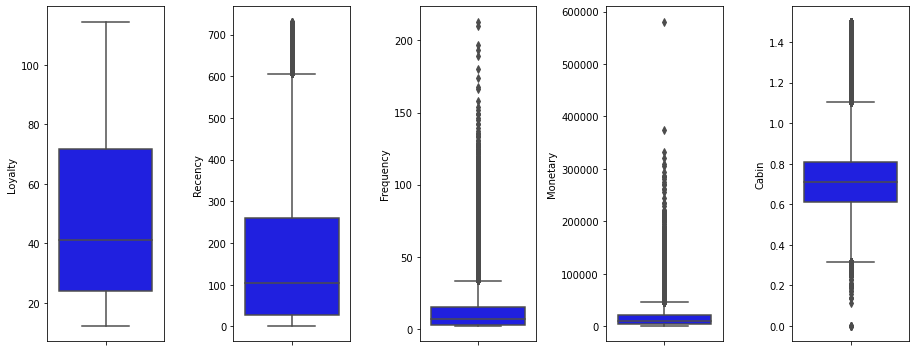

In [ ]:
plt.figure(figsize=(18,5))

feature = list(df_LRFMC)
for i in range(0, len(feature)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feature[i]],color='blue', orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_LRFMC)}')

filtered_entries = np.array([True] * len(df_LRFMC))

for col in feature:
    zscore = abs(stats.zscore(df_LRFMC[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_LRFMC = df_LRFMC[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_LRFMC)}')

Jumlah baris sebelum memfilter outlier: 57860
Jumlah baris setelah memfilter outlier: 54893


### scaling

Karena akan digunakan K-Means yang merupakan Machine learning berdasarkan jarak sehingga scalling data yang digunakan adalah standarisasi.

In [ ]:
# Standardize data 
std = StandardScaler().fit_transform(df_LRFMC)
df_LRFMC_std = pd.DataFrame(std, columns = list(df_LRFMC))
df_LRFMC_std

,Loyalty,Recency,Frequency,Monetary,Cabin
0,1.248547,-0.572522,4.200737,4.329591,3.343879
1,-0.446899,-0.973400,4.099816,4.013088,3.488529
2,-0.975599,-0.928858,3.292446,3.997115,3.317727
3,-0.142896,-0.917722,3.292446,3.918661,3.324415
4,1.339868,-0.411058,-0.441639,4.140170,2.788698
...,...,...,...,...,...
54888,-1.100565,1.910692,-0.845324,-0.969669,-2.899447
54889,-1.235143,1.025421,-0.845324,-0.969669,-2.899447
54890,-1.289214,1.008717,-0.845324,-0.993417,-2.261524
54891,-0.093631,-0.761826,-0.845324,-0.972072,-3.058927


### Correlation Plot

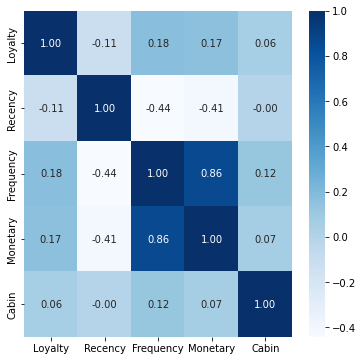

In [ ]:
# heatmap correlation
corr = df_LRFMC_std.corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

Feature F (Frequency) and M (Monetary) is highly correlated, which is make sense. The more frequent a customer flies, the further flight distance is.

## Modelling using K-Means Clustering

### clustering 

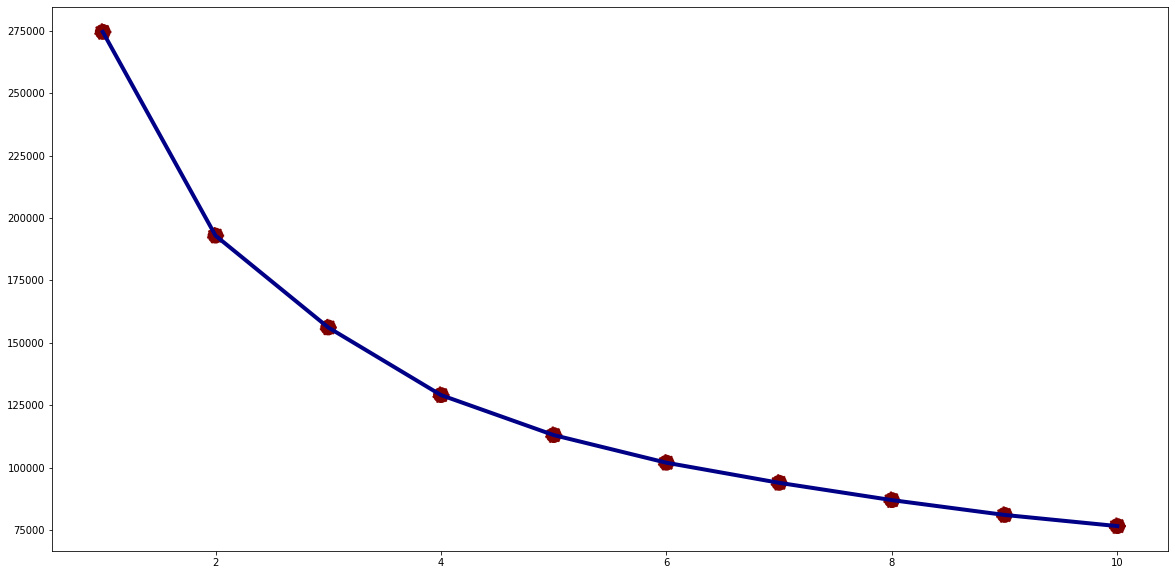

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_LRFMC_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')



In [ ]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    29.698527
1    19.043673
2    17.317201
3    12.394811
4     9.776376
5     7.873743
6     7.354307
7     6.815091
8     5.492365
9          NaN
dtype: float64

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_LRFMC_std)
    preds = kmeans.predict(df_LRFMC_std)
     
    score_euclidean = silhouette_score(df_LRFMC_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

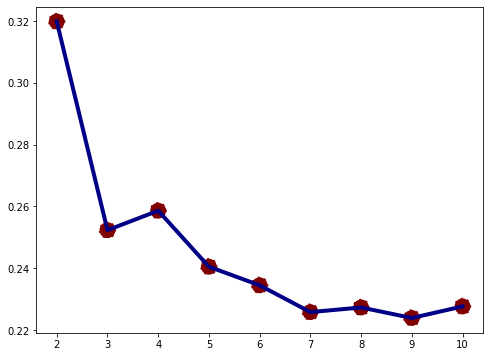

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Terlihat dari evaluasi menggunakan elbow method dan silhouette score menunjukkan bahwa jumlah clusters yang optimal adalah 4 clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_LRFMC_std.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_LRFMC_std['cluster'] = kmeans.labels_
df_LRFMC['cluster'] = kmeans.labels_
df_LRFMC_std.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Loyalty,Recency,Frequency,Monetary,Cabin,cluster
0,1.248547,-0.572522,4.200737,4.329591,3.343879,1
1,-0.446899,-0.973400,4.099816,4.013088,3.488529,1
2,-0.975599,-0.928858,3.292446,3.997115,3.317727,1
3,-0.142896,-0.917722,3.292446,3.918661,3.324415,1
4,1.339868,-0.411058,-0.441639,4.140170,2.788698,1


In [ ]:
#merge with original dataset
df_clustered = pd.merge(df_LRFMC, df_LRFMC_std, left_index=True, right_index=True)
df_clustered#['Loyalty_x', 'Recency_x', 'Frequency_x', 'Monetary_x', 'Cabin_x', 'cluster']

,Loyalty_x,Recency_x,Frequency_x,Monetary_x,Cabin_x,cluster_x,Loyalty_y,Recency_y,Frequency_y,Monetary_y,Cabin_y,cluster_y
444,82.633333,73,52,76072,1.228696,1,0.991407,-0.934426,3.090603,4.023690,0.045241,1
504,35.600000,1,51,71594,1.251371,1,-0.383214,-0.672742,1.576785,4.523818,-0.449110,1
531,20.933333,9,43,71368,1.224597,1,0.454295,-0.951129,3.998894,3.932726,-0.000976,1
554,44.033333,11,43,70258,1.225645,1,-0.476938,-0.856477,1.677706,3.584135,0.308173,1
588,85.166667,102,6,73392,1.141667,1,1.520107,-0.850909,3.393367,2.472136,1.764145,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54888,36.500000,370,3,3824,0.346627,3,-1.100565,1.910692,-0.845324,-0.969669,-2.899447,3
54889,46.900000,416,2,2712,0.488717,3,-1.235143,1.025421,-0.845324,-0.969669,-2.899447,3
54890,36.666667,275,2,2334,0.567725,3,-1.289214,1.008717,-0.845324,-0.993417,-2.261524,3
54891,29.100000,237,2,1380,0.960000,2,-0.093631,-0.761826,-0.845324,-0.972072,-3.058927,2


### Visualisasi menggunakan PCA dan Scatterplot

Untuk melihat cluster secara visual dilakukan reduksi dimensi dengan menggunakan PCA lalu dilakukan plot menggunakan scatter plot

In [ ]:
from sklearn.decomposition import PCA 
#PCA dengan component = 2
pca = PCA(n_components=2)

pca.fit(df_LRFMC_std)
pcs = pca.transform(df_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_


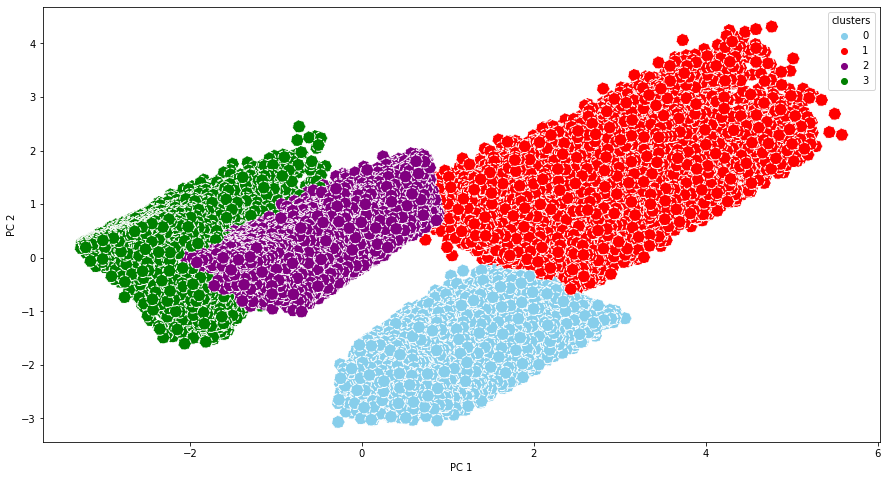

In [ ]:
# Plot the cluster in scatterlot

fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['skyblue','red','purple','green'],
    s=160,
    ax=ax
)

Dar hasil scatterplot di atas dapat dikatakan bahwa jumlah cluster sama dengan 4 merupakan jumlah cluster yang tepat. Dimana dapat dilihat bahwa terlihat segmentasi yang cukup jelas antar clusternya

## Interpretasi cluster

### Statistik feature dari setiap cluster

In [ ]:
cluster = kmeans.labels_
df_LRFMC_std['clusters'] = cluster

In [ ]:
# jumlah customer masing-masing cluster
df_clus = df_LRFMC_std['clusters'].value_counts().reset_index()
df_clus.columns = ['cluster','costumer']
df_clus['percentage (%)'] = round((df_clus['costumer']/(sum(df_clus['costumer'])))*100,2)
df_clus

,cluster,costumer,percentage (%)
0,2,21750,39.62
1,0,13434,24.47
2,3,11209,20.42
3,1,8500,15.48


Text(0.5, 1.0, 'Jumlah Customer Untuk Setiap Cluster')

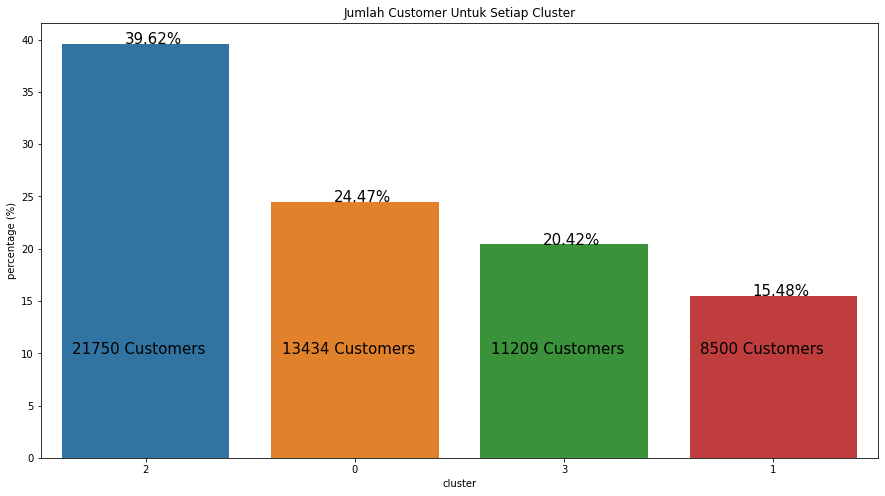

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

br = sns.barplot(x = 'cluster',y='percentage (%)',
                 data=df_clus,ax=ax, 
                 order=df_clus.sort_values('percentage (%)',ascending = False).cluster)

x = np.arange(len(df_clus['cluster']))
y = df_clus['percentage (%)']
z = df_clus['costumer']

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i], s = str(y[i])+'%', size = 15) # add data points

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.35 , y = 10, s = str(z[i])+' Customers', size = 15) # add data points

plt.title('Jumlah Customer Untuk Setiap Cluster')

In [ ]:
display(df_LRFMC.groupby('cluster').agg(['mean','median']))

Loyalty                Recency         Frequency         \
              mean     median        mean median       mean median   
cluster                                                              
0        80.885403  79.766667  120.618580   98.0   8.294626    7.0   
1        56.851890  53.400000   45.703529   22.0  28.992118   27.0   
2        28.905215  27.033333  106.919724   89.0   7.801379    7.0   
3        38.913165  32.133333  474.384245  468.0   3.749755    3.0   

             Monetary              Cabin            
                 mean   median      mean    median  
cluster                                             
0        11766.607712  10192.0  0.714923  0.713117  
1        41119.878941  38565.0  0.740860  0.728240  
2        11094.207172   9393.5  0.682332  0.686979  
3         5742.077795   4288.0  0.707517  0.715337

- Cluster 0 : menunjukkan customer yang sudah bergabung sekitar hampir 7 tahun, jarang melakukan penerbangan dan jarak penerbangan yang dilakukan tidak jauh (retained customer)
- Cluster 1 : menunjukkan customer yang sudah bergabung sekitar hampir 5 tahun, aktif dalam menggunakan jasa penerbangan dan sering berpergian dengan jarak yang cukup jauh (High-value customer)
- Cluster 2 : menunjukkan customer yang sudah bergabung sekitar 2 tahun (tergolong baru), sering melakukan penerbangan dan jaraknya cukup jauh. (potential customer)
- Cluster 3 : menunjukkan customer yang sudah bergabung sekitar 3 tahun (tergolong baru) namun sangat jarang menggunakan jasa penerbangan dan sekali menggunakan juga tidak terlalu jauh (low-value customer)

Strategi bisnis : 
- Membuat sebuah skema reward untuk pelanggan loyal yang sering menggunakan jasa penerbangan dan skema tersebut dapat meningkat seiring meningkatnya pengeluaran yang dilakukan oleh customer, sehingga customer yang loyal ini merasa memiliki target untuk mengejar skema reward yang lebih tinggi yang menurutnya menguntungkan dan juga menguntungkan bagi perusahaan.
- Membuat sebuah sistem promo secara general (untuk keseluruhan customer) dalam bentuk voucher yang memiliki kode unik yang semakin cepat diklaim maka nilai potongannya cukup besar (untuk memancing customer menggunakan jasa penerbangan lebih sering agar frekuensi penggunaan jasanya meningkat) dan berlaku juga sebaliknya (semakin lama diklaim semakin kecil nilai potongannya)